## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo II - Redes Neurais Convolucionais (CNNs)</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---
### Questão 1)

Considere duas camadas de redes neurais profundas:

A. Camada densa com 16 neurônios, cuja entrada é um vetor de 1536 dimensões;<br>
B. Camada convolucional com 64 neurônios (filtros) de tamanho 3x3, cuja entrada é uma matriz de 32x48 valores

Qual o total de parâmetros a serem aprendidos em cada camada?

(a) A = 1552 parâmetros; B = 640 parâmetros <br>
<font color='red'>(b) A = 24592 parâmetros; B = 640 parâmetros</font> <br>
(c) A = 24592 parâmetros; B = 65 parâmetros <br>
(d) A = 1552 parâmetros; B = 65 parâmetros <br>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Arquitetura A
input_shape=(1536,)
CNNA = keras.Sequential()
CNNA.add(keras.layers.Dense(16, activation="relu", input_shape=input_shape))
CNNA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                24592     
Total params: 24,592
Trainable params: 24,592
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Arquitetura B
input_shape=(32,48,1)
CNNB = keras.Sequential()
CNNB.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
CNNB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 46, 64)        640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


---
### Questão 2)

Considere o conceito de "campo receptivo local" como uma região de certo tamanho dos dados de entrada que é processada de forma a gerar a saída. Considere ainda dois tipos de unidades de processamento de redes neurais profundas:

A. Neurônio de camada densa (tipo Perceptron), que recebe por entrada um vetor com 3072 dimensões<br>
B. Neurônio de camada convolucional (filtro) de tamanho K x K x P, que recebe por entrada uma imagem com 32 x 32 x 3 dimensões.

Qual é o tamanho do campo receptivo local para cada valor de saída computado por A e B?

 (a) A = 1; B = 32 x 32 x 3<br>
<font color='red'> (b) A = 3072; B = K x K x P</font><br>
 (c) A = K x K; B = K x K x P<br>
 (d) A = 3072; B = 32 x 32 x 3<br>

O Percéptron recebe por entrada todos os atributos, ou todas as dimensões, e depois atribui um peso a cada um deles.<br>

O Filtro de correlação cruzada (convolucional) é aplicado somente sobre uma região da imagem de entrada, definida pelo tamanho K x K x P.<br>

---
### Questão 3)

Utilizando a biblioteca Keras, projete uma rede neural para processar dados unidimensionais (dimensionalidade do vetor de entrada = 1024), e que contenha as seguintes camadas:

1. camada max pooling 1D com tamanho de pool = 4
2. camada convolucional 1D com 32 filtros de tamanho 25, sem padding
3. camada max pooling 1D com tamanho de pool = 8
4. camada convolucional 1D com 16 filtros de tamanho 25, sem padding
5. camada global max pooling 1D

Essa arquitetura poderia ser utilizada para receber por entrada uma janela de uma série temporal contendo 1024 instancias e aprender um espaço de características compacto com a camada Global Max Pooling.

Quais as dimensionalidades das saídas das camadas 1 (primeiro MaxPooling), 4 (segunda Convolucional) e 5 (Global Max Pooling)?

(a) 1=(256,1); 4=(16,5); 5=(16)<br>
(b) 1=(4,1); 4=(5,16); 5=(25)<br>
(c) 1=(4,1); 2=(16,5); 3=(25)<br>
<font color='red'>(d) 1=(256,1); 4=(5,16); 5=(16)</font><br>

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
# Arquitetura C
input_shape=(1024,1)
CNNC = keras.Sequential()
CNNC.add(keras.layers.MaxPooling1D(pool_size=4, input_shape=input_shape))
CNNC.add(keras.layers.Conv1D(32, kernel_size=25, padding='valid', activation='relu'))
CNNC.add(keras.layers.MaxPooling1D(pool_size=8))
CNNC.add(keras.layers.Conv1D(16, kernel_size=25, padding='valid', activation='relu'))
CNNC.add(keras.layers.GlobalMaxPooling1D())
CNNC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d (MaxPooling1D) (None, 256, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 232, 32)           832       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 16)             12816     
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
Total params: 13,648
Trainable params: 13,648
Non-trainable params: 0
_________________________________________________________________


---
### Questão 4)

Carregue a base de dados CIFAR-10 conforme o código abaixo. Normalize os dados das imagens de forma a que os valores estejam entre 0 e 1, depois converta as classes para o tipo categórico utilizando o ` tf.keras.utils.to_categorical`.

A seguir, crie uma CNN para classificar imagens dessa base de dados, contendo como camadas:

1. convolucional 1 com 32 filtros de tamanho $3\times 3$, com padding e stride 1 (nas duas direções)
2. maxpooling com tamanho 2 e stride 2 nas duas direções
3. convolucional 2 com 32 filtros de tamanho $1\times 3$, com padding e stride $1,2$
4. convolucional 3 com 32 filtros de tamanho $3\times 1$, com padding e stride $2,1$
5. convolucional 4 com 64 filtros de tamanho $3\times 3$, sem padding e stride 1 (nas duas direções).
6. global max pooling
7. classificador softmax

Quais os tamanhos das saídas das camadas de 1 até 6?

(a) 1=(28,28,32); 2=(14,14,32); 3=(7,14,32); 4=(7,7,32); 5=(5,5,64); 6=(64)<br>
(b) 1=(32,32,32); 2=(16,16,16); 3=(8,16,32); 4=(8,8,128); 5=(6,6,64); 6=(10)<br>
(c) 1=(28,28,32); 2=(8,8,16); 3=(7,14,32); 4=(7,7,32); 5=(5,5,64); 6=(10) <br>
<font color='red'>(d) 1=(32,32,32); 2=(16,16,32); 3=(16,8,32); 4=(8,8,32); 5=(6,6,64); 6=(64)</font><br>

In [6]:
# Para ignorar o certificado de segurança na importação do dataset
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

(50000, 32, 32, 3)
Classes:  10


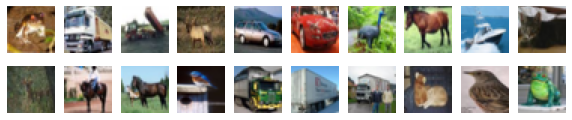

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')
    
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

# Normalizando as entradas
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Categorizando as classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em 
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

In [8]:
# Arquitetura D
CNND = keras.Sequential()
CNND.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
                             input_shape=input_shape))
CNND.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNND.add(keras.layers.Conv2D(32, kernel_size=(1,3), strides=(1,2), padding='same', activation='relu'))
CNND.add(keras.layers.Conv2D(32, kernel_size=(3,1), strides=(2,1), padding='same', activation='relu'))
CNND.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
CNND.add(keras.layers.GlobalMaxPooling2D())
CNND.add(keras.layers.Dense(num_classes, activation="softmax"))
CNND.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 8, 32)         3104      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          3104      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

---

### Questão 5)

Carregue a base de dados CIFAR-10 conforme o código abaixo. Normalize os dados das imagens de forma a que os valores estejam entre 0 e 1, depois converta as classes para o tipo categórico utilizando o ` tf.keras.utils.to_categorical`. Iremos usar um subconjunto de treinamento contendo as primeiras 10000 imagens (ver código)

A seguir, crie uma CNN para classificar imagens dessa base de dados, contendo como camadas:

1. convolucional 1 com 32 filtros de tamanho $3\times 3$, com padding e stride 1 (nas duas direções)
2. maxpooling com tamanho 2 e stride 2 nas duas direções
3. convolucional 2 com 32 filtros de tamanho $1\times 3$, com padding e stride $1,2$
4. convolucional 3 com 32 filtros de tamanho $3\times 1$, com padding e stride $2,1$
5. convolucional 4 com 64 filtros de tamanho $3\times 3$, sem padding e stride 1 (nas duas direções).
6. global max pooling
7. classificador softmax

Todas as camadas convolucionais devem ter ativação relu.

Iremos repetir 5 vezes o experimento de treinamento e avaliação dessa rede, da seguinte forma: defina as sementes aleatórias do numpy para 1 e do tensorflow para 2. Depois, utilizando a arquitetura definida, configure a rede para treinar com a configuração abaixo.
* otimizador: SGD
* taxa de aprendizado: 0.05
* função de custo: `categorical_crossentropy`
* métrica: `accuracy`
* épocas: 15
* batchsize: 32

Após o processo de aprendizado, obtenha a acurácia calculada no conjunto de treinamento e no conjunto de testes utilizando a função `evaluate()`.

Com base na média da acurácia de treinamento e teste obtida das 5 execuções, escolha a opção cujo intervalo se enquadre nos valores obtidos.

<font color='red'>(a) Acurácia Treinamento = [44, 49],  Acurácia Teste = [37, 42]</font><br>
(b) Acurácia Treinamento = [50, 56],  Acurácia Teste = [43, 49]<br>
(c) Acurácia Treinamento = [38, 43],  Acurácia Teste = [37, 42]<br>
(d) Acurácia Treinamento = [44, 49],  Acurácia Teste = [43, 48]<br>

(50000, 32, 32, 3)
Classes:  10


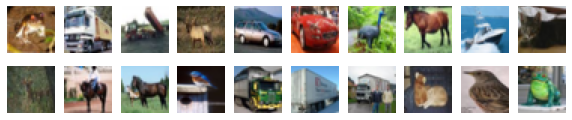

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')
    
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

# Normalizando as entradas
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Categorizando as classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em 
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)
    
## subconjunto
x_train_sub = x_train[:10000]
y_train_sub = y_train[:10000]

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [11]:
accuracy_train = []
accuracy_test = []
    
# repeticao dos experimentos
for i in range(5):
    # sementes
    seed(1)
    set_seed(2)
   
    # criar modelo
    # Arquitetura Dentro do laço para não precisar resetar
    # Camada Dense exige um vetor de entrada unidimensional, caso não seja deve-se usar uma camada 'Flatten'
    CNN = keras.Sequential()
    CNN.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
                                 input_shape=input_shape))
    CNN.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    CNN.add(keras.layers.Conv2D(32, kernel_size=(1,3), strides=(1,2), padding='same', activation='relu'))
    CNN.add(keras.layers.Conv2D(32, kernel_size=(3,1), strides=(2,1), padding='same', activation='relu'))
    CNN.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
    CNN.add(keras.layers.GlobalMaxPooling2D())
    CNN.add(keras.layers.Dense(num_classes, activation="softmax"))
    CNN.summary()    
    
    # compilar modelo
    CNN.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              metrics=['accuracy'])
    
    # treinar modelo
    batch_size = 32
    epochs = 15
    history = CNN.fit(x_train_sub, y_train_sub, batch_size=batch_size, epochs=epochs, verbose=1)
        
    # avaliar modelo e armazenar valores
    score_train = CNN.evaluate(x_train_sub, y_train_sub, verbose = 0)
    score_test = CNN.evaluate(x_test, y_test, verbose = 0)
    accuracy_train.append(score_train[1])
    accuracy_test.append(score_test[1])
    print('Iteração: %.1f score_train: %.4f  score_test: %.4f' % (i+1, score_train[1], score_test[1]))

print("Acurácia Treino: ", accuracy_train)
print("Acurácia Teste: ", accuracy_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 8, 32)         3104      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          3104      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               